In [2]:
import numpy as np
import operator
import os,sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [3]:
#Importing standard libraries
import numpy as np
import operator
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

# Part 2 imports 
from scipy.stats import norm
from sklearn.preprocessing import PolynomialFeatures

In [4]:
log_df = pd.read_csv('/Users/benjaminmanning/Desktop/PAE/github/data/logData.csv')
caller_df = pd.read_csv('/Users/benjaminmanning/Desktop/PAE/github/data/caller_data.csv')
caller_df['ratio'].describe()
caller_df['outcome'] = [1 if i > .25 else 0 for i in caller_df['ratio']]
caller_df

,callerId,noCallsMade,langId,n.x,con_play,con_replay,adjusted_con,ratio,noContentListened,caller_lifetime,day,month,year,last_day,last_month,last_year,n.y,outcome
0,8690,7110,1,2141,112,10,102,0.014,424,5.750,23,6,2014.500,25.0,3.0,2020.250,2141,0
1,10211,107,1,41,6,3,3,0.028,135,5.000,3,7,2014.583,15.0,7.0,2019.583,41,0
2,13512,127,1,58,3,0,3,0.024,169,5.667,6,7,2014.583,19.0,3.0,2020.250,58,0
3,14706,47,1,52,5,1,4,0.085,70,5.167,8,7,2014.583,7.0,9.0,2019.750,52,0
4,16066,120,1,82,4,1,3,0.025,85,5.583,9,7,2014.583,14.0,2.0,2020.167,82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4872583,21,1,625,79,13,66,3.143,59,0.083,13,2,2020.167,25.0,3.0,2020.250,625,1
996,4882478,37,2,575,57,6,51,1.378,50,0.083,19,2,2020.167,21.0,3.0,2020.250,575,1
997,4884892,26,1,819,87,13,74,2.846,55,0.000,21,2,2020.167,26.0,2.0,2020.167,819,1
998,4889349,109,1,2539,253,87,166,1.523,75,0.083,24,2,2020.167,26.0,3.0,2020.250,2539,1


In [5]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

caller_df = clean_dataset(caller_df)


In [6]:
x = caller_df[['noCallsMade', 'langId', 'caller_lifetime', 'month', 'year', 'last_month','last_year']]
x = caller_df[['caller_lifetime']]
y = caller_df['adjusted_con']

##Splitting the data into train and test sets with 75% training data and 25% testing data. Set random_state=109
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.75, random_state = 109)


(       caller_lifetime
 count          246.000
 mean             3.162
 std              1.536
 min              0.083
 25%              2.104
 50%              3.000
 75%              4.667
 max              5.667,
 count    246.000
 mean      14.829
 std       26.255
 min        0.000
 25%        2.000
 50%        6.000
 75%       16.750
 max      211.000
 Name: adjusted_con, dtype: float64)

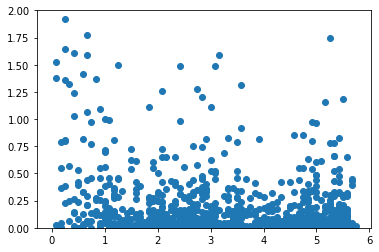

In [7]:
plt.scatter(caller_df['caller_lifetime'],caller_df['ratio'])
plt.ylim(0,2)

x_test.describe(), y_test.describe()

In [41]:
## Fit a kNN regression model to the training set for the following 8 different values of  𝑘 :  𝑘=1,2,3,5,7,10,50,100 .
## and make 8 scatter plots of response vs. predictor for each  𝑘 , arranged in a  4×2  grid. 
## Each figure should have plots of the prediction from the k-NN regression and the actual data points on the same figure, as well as axis labels, title, and legend
# your code here 

# Initializing the list of k values
k_list = [1,2,3,5,7,10,50,100]
knn_dict = {}
plot_count = 1

# Initializing the list plots

# Creating the model and the plot for each k value in k_list
for i in range(1, 9):
    
    # fit and predict the model for k = i-1
    model = KNeighborsRegressor(n_neighbors=int(k_list[i-1]))
    model.fit(x_train,y_train)
    
    # Calculate MSE on both the test and training set for the model
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    MSE_test = mean_squared_error(y_test,y_pred)
    MSE_train = mean_squared_error(y_train,y_pred_train)
    knn_dict[k_list[i-1]] = [] 
    knn_dict[k_list[i-1]].append(MSE_test)
    knn_dict[k_list[i-1]].append(MSE_train)


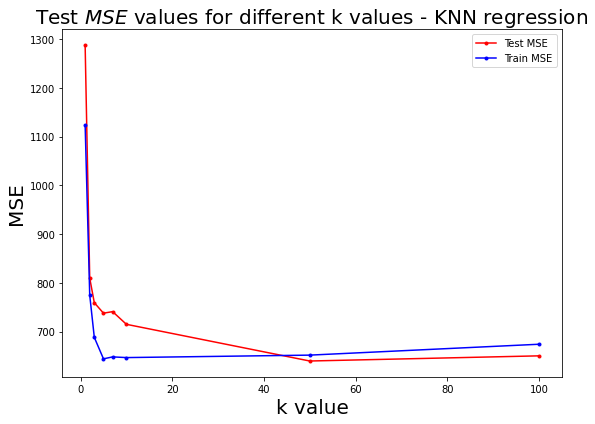

In [42]:

# Now make MSE plots
plt.figure(figsize=(8,6))

# Plot Test and train MSE as distinct lines
plt.plot(k_list, [value[0] for value in knn_dict.values()],'k.-', color = 'r', label = 'Test MSE')
plt.plot(k_list, [value[1] for value in knn_dict.values()],'k.-', color = 'b', label = 'Train MSE')

# Make the graph Beautiful
plt.grid(False)
plt.legend()
plt.xlabel('k value',fontsize=20)
plt.ylabel('MSE',fontsize = 20)
plt.title('Test $MSE$ values for different k values - KNN regression',fontsize=20)
plt.tight_layout()

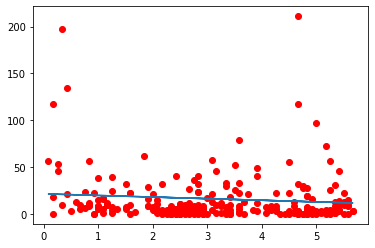

In [43]:
model = LinearRegression()

model = model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)
plt.scatter(x_test,y_test, c='r')
plt.plot(x_test,y_pred_test)



In [ ]:
## Report the $MSE$ and $R^2$ from the training and test sets.

# Test MSE and R-squared
y_pred_test = model.predict(x_test)
test_mse = mean_squared_error(y_pred_test, y_test)
print(f'The test MSE is {test_mse: .3f}')
print(f"The R-squared for the test data is {r2_score(y_test, y_pred_test): .3f}")

# Train MSE and R-squared
y_pred_train = model.predict(x_train)
train_mse = mean_squared_error(y_pred_train, y_train)
print(f'The train MSE is {train_mse: .3f}')
print(f"The R-squared for the training data is {r2_score(y_train, y_pred_train): .3f}")


In [18]:
## Report the $MSE$ and $R^2$ from the training and test sets.

# Test MSE and R-squared

test_accuracy = model.score(x_test, y_test)
print(f'The test accuracy is {test_accuracy: .3f}')
#print(f"The R-squared for the test data is {r2_score(y_test, y_pred_test): .3f}")

# Train MSE and R-squared
train_accuracy = model.score(x_train, y_train)
print(f'The train accuracy is {train_accuracy: .3f}')
#print(f"The R-squared for the training data is {r2_score(y_train, y_pred_train): .3f}")


The test accuracy is  0.736
The train accuracy is  0.746


In [19]:
caller_df['outcome'].describe()

count    983.000
mean       0.256
std        0.437
min        0.000
25%        0.000
50%        0.000
75%        1.000
max        1.000
Name: outcome, dtype: float64